In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv


In [36]:
import pandas as pd

file_path = "/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv"

df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


Dataset Loaded Successfully!
Shape: (36520, 12)


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [37]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [38]:
# Check how many null (NaN) values in each column
null_counts = df.isnull().sum()

In [39]:
# Check how many zero values in each column
zero_counts = (df == 0).sum()

# Combine both into one DataFrame for easy view
missing_summary = pd.DataFrame({
    'Null_Values': null_counts,
    'Zero_Values': zero_counts
})

# Show the result
print(missing_summary)

              Null_Values  Zero_Values
Date                    0            0
Crop_Type               0            0
Soil_Type               0            0
Soil_pH                 0            0
Temperature             0            0
Humidity                0            0
Wind_Speed              0            0
N                       0            0
P                       0            0
K                       0            0
Crop_Yield              0        11025
Soil_Quality            0            0


In [40]:
# Filter rows where Crop_Yield is 0
zero_yield_rows = df[df['Crop_Yield'] == 0]

# Show all rows (or first few) with Crop_Yield = 0
print("Rows where Crop_Yield = 0:")
print(zero_yield_rows)

# Now count how many zero yields per Crop_Type
zero_yield_count_per_crop = zero_yield_rows['Crop_Type'].value_counts()

print("\nNumber of zero Crop_Yield values per Crop_Type:")
print(zero_yield_count_per_crop)

Rows where Crop_Yield = 0:
             Date  Crop_Type Soil_Type  Soil_pH  Temperature  Humidity  Wind_Speed     N     P     K  Crop_Yield  Soil_Quality
0      2014-01-01      Wheat     Peaty     5.50     9.440599      80.0   10.956707  60.5  45.0  31.5         0.0     22.833333
2      2014-01-01       Rice     Peaty     5.50    12.143099      80.0    7.227751  71.5  54.0  38.5         0.0     27.333333
6      2014-01-01  Sugarcane    Saline     8.00    13.533004      80.0    9.910484  84.5  66.0  54.0         0.0     17.041667
12     2014-01-02       Rice     Peaty     5.50    14.421759      80.0    9.096689  71.5  54.0  38.5         0.0     27.333333
14     2014-01-02    Soybean     Peaty     5.50     9.347238      80.0   10.403287  49.5  45.0  38.5         0.0     22.166667
...           ...        ...       ...      ...          ...       ...         ...   ...   ...   ...         ...           ...
36502  2023-12-30       Rice     Sandy     6.75     9.629740      80.0    9.134019  

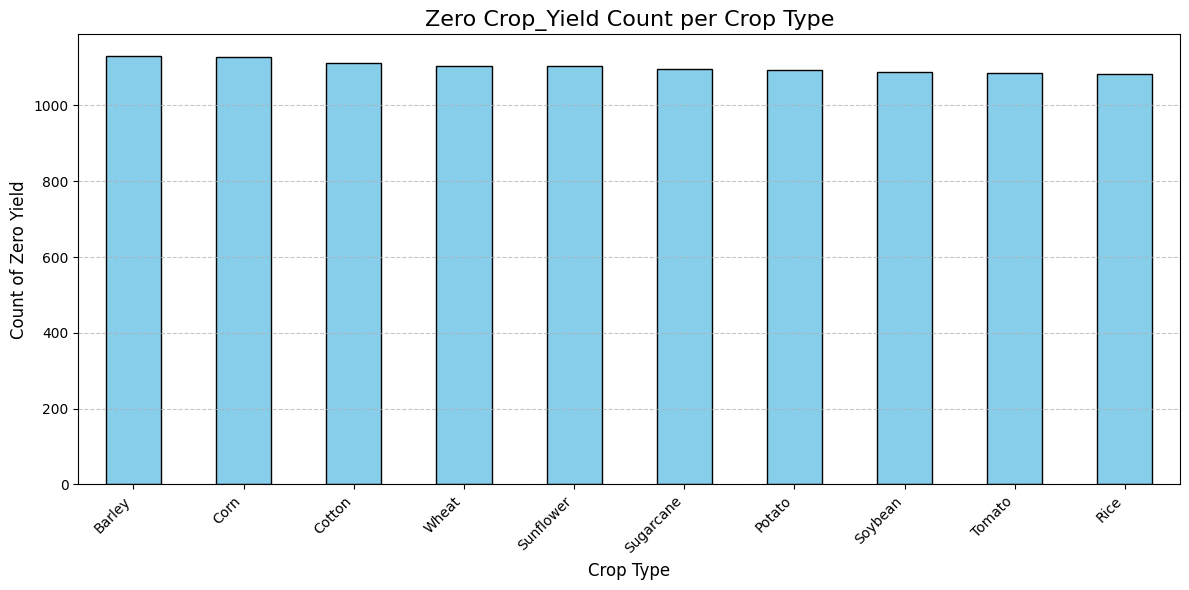

In [41]:
import matplotlib.pyplot as plt

# Step 1: Filter rows where Crop_Yield = 0
zero_yield_rows = df[df['Crop_Yield'] == 0]

# Step 2: Count zero yield per Crop_Type
zero_yield_count_per_crop = zero_yield_rows['Crop_Type'].value_counts()

# Step 3: Plot the result
plt.figure(figsize=(12, 6))
zero_yield_count_per_crop.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 4: Beautify the chart
plt.title('Zero Crop_Yield Count per Crop Type', fontsize=16)
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Count of Zero Yield', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Show the plot
plt.tight_layout()
plt.show()

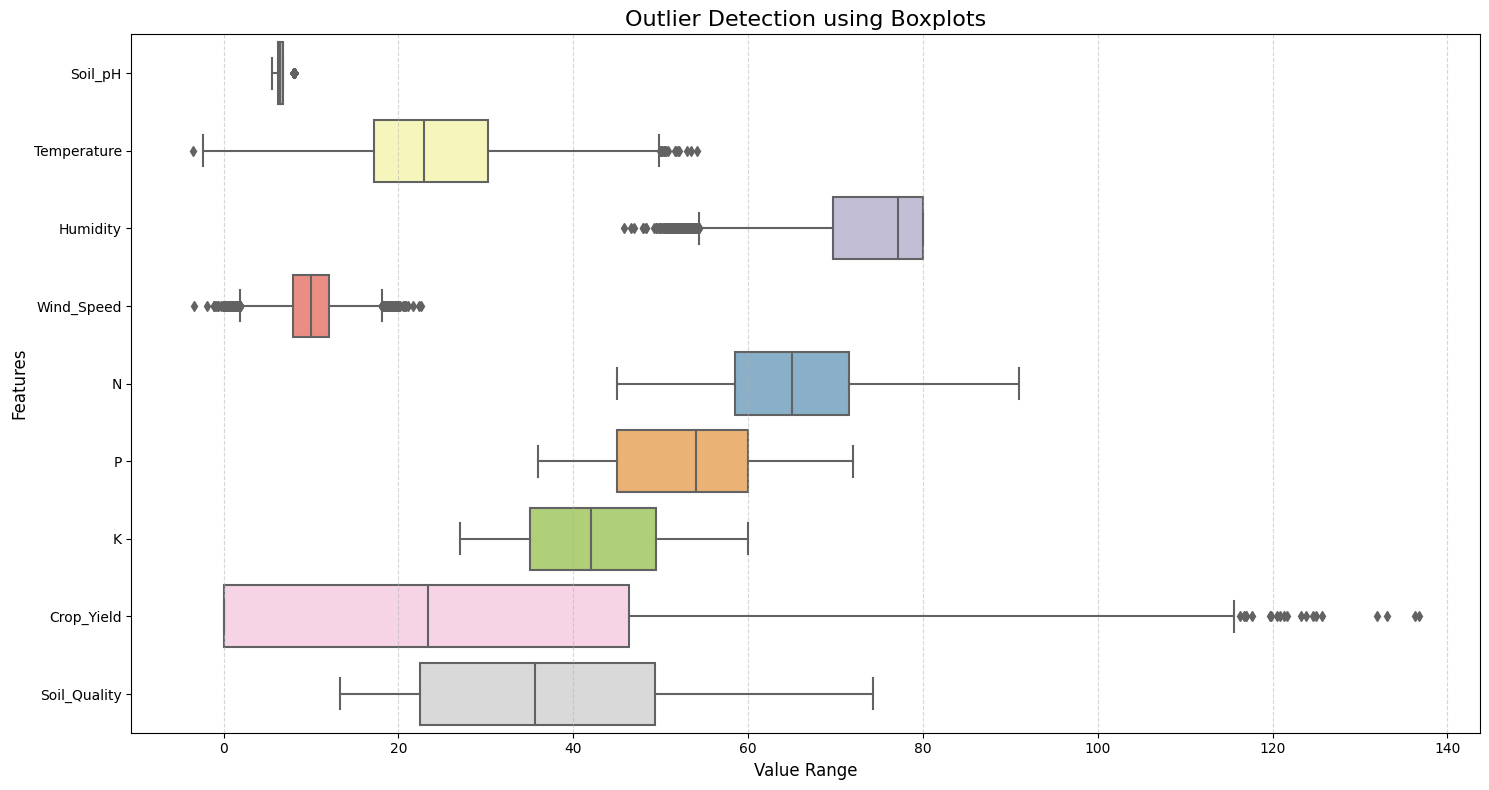

In [42]:
import seaborn as sns

# Select numeric columns
numeric_cols = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed',
                'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']

# Set figure size
plt.figure(figsize=(15, 8))

# Boxplot for all numeric columns
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set3')

plt.title("Outlier Detection using Boxplots", fontsize=16)
plt.xlabel("Value Range", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [43]:
# Step 1: Remove rows where Crop_Yield = 0
df_clean = df[df['Crop_Yield'] != 0].copy()

# Step 2: Show how many rows were removed
removed_rows = len(df) - len(df_clean)
print(f"✅ Removed {removed_rows} rows with zero Crop_Yield.")
print(f"📊 New dataset shape: {df_clean.shape}")

# Step 3: Save cleaned dataset inside Kaggle's output folder
output_path = "/kaggle/working/AgriYield_cleaned.csv"
df_clean.to_csv(output_path, index=False)

print(f"💾 Cleaned dataset saved to: {output_path}")


✅ Removed 11025 rows with zero Crop_Yield.
📊 New dataset shape: (25495, 12)
💾 Cleaned dataset saved to: /kaggle/working/AgriYield_cleaned.csv


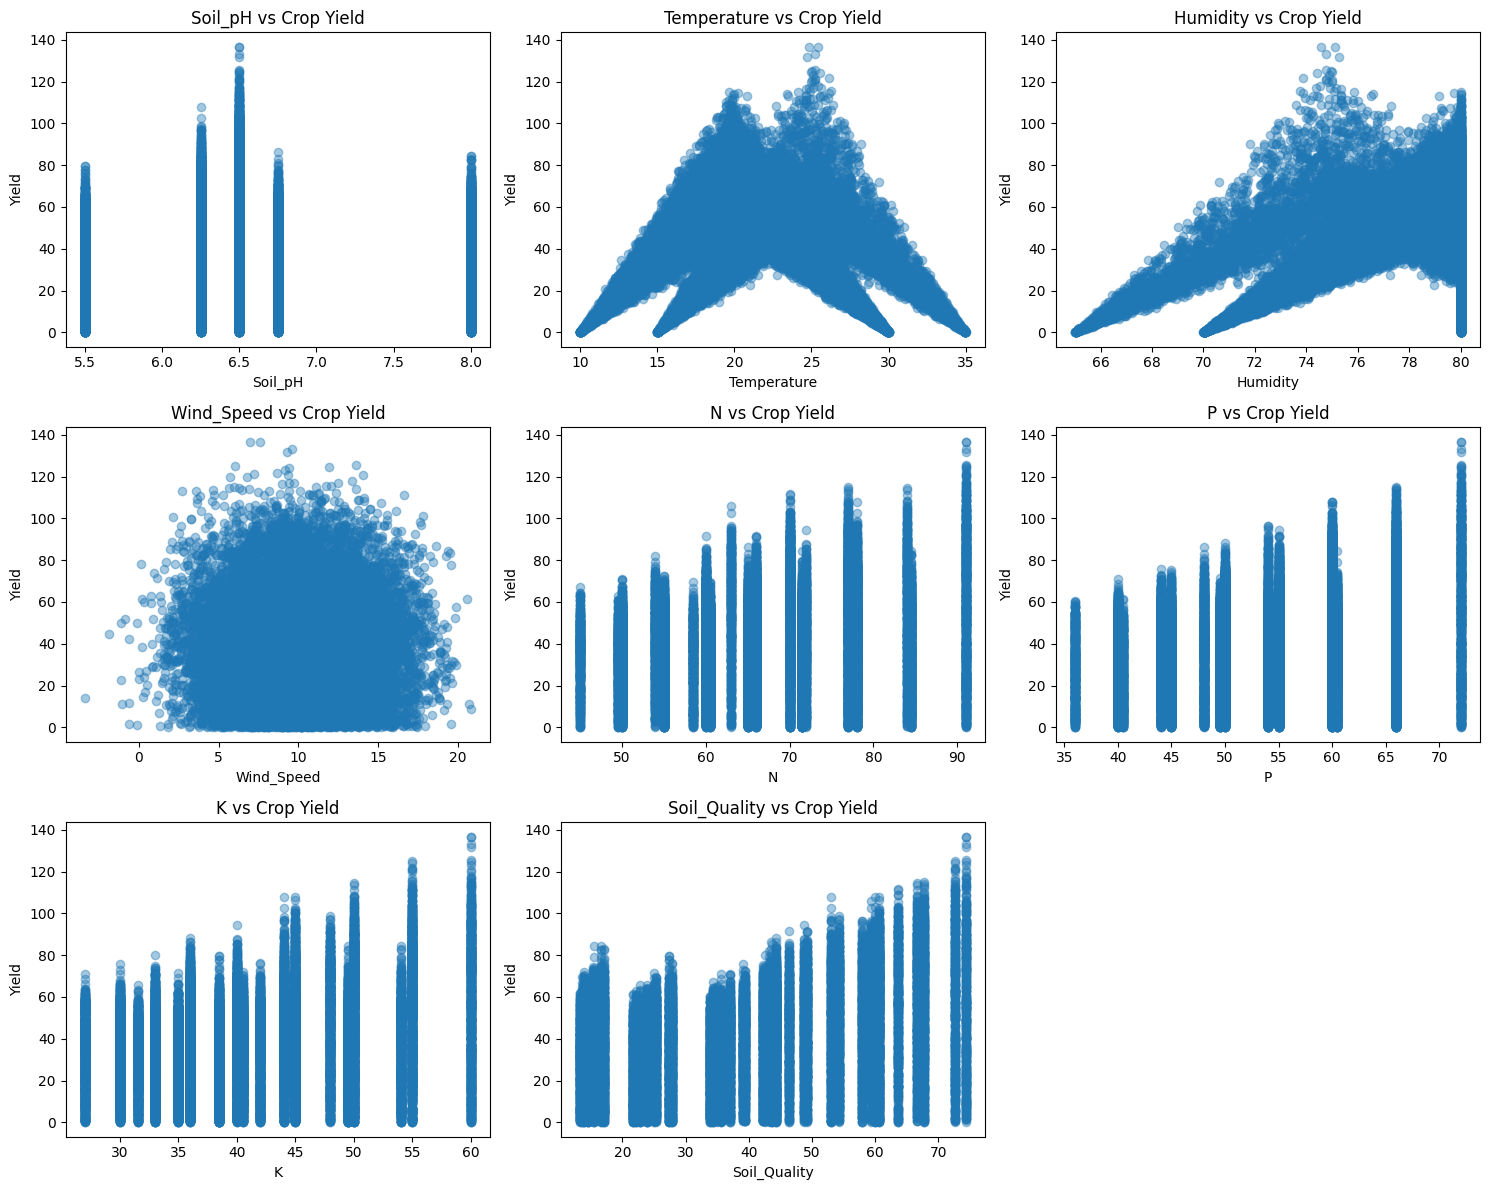

In [44]:
numeric_features = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df_clean[col], df_clean['Crop_Yield'], alpha=0.4)
    plt.title(f'{col} vs Crop Yield')
    plt.xlabel(col)
    plt.ylabel('Yield')
plt.tight_layout()
plt.show()
     

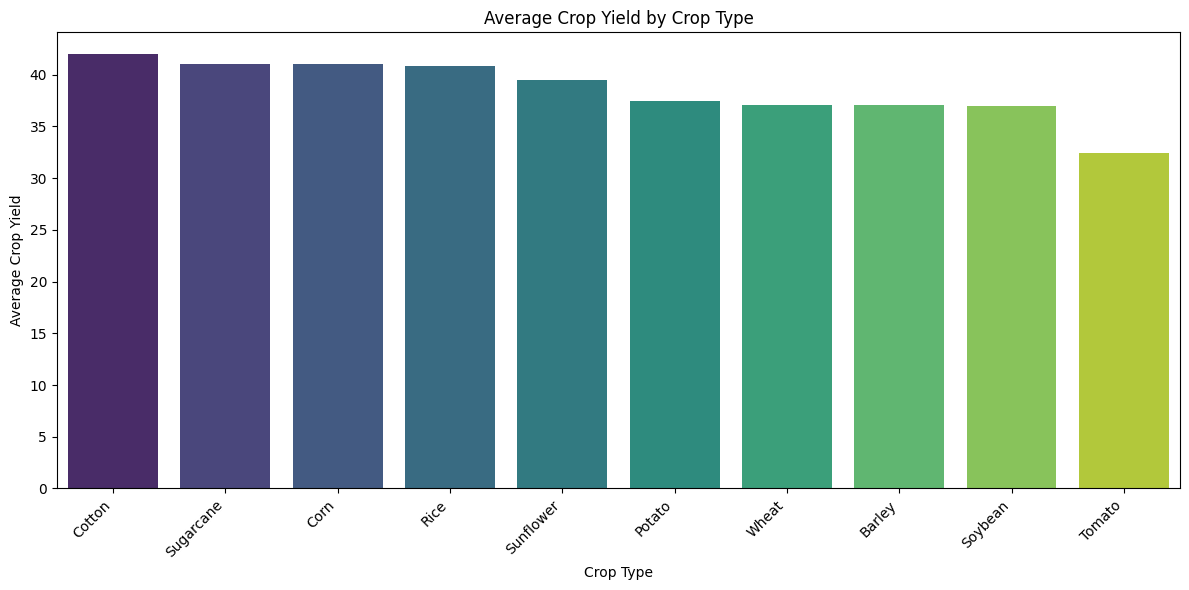

In [45]:
# Group by crop and take the average yield
avg_yield = df_clean.groupby('Crop_Type')['Crop_Yield'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_yield.index, y=avg_yield.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Crop Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Crop Yield')
plt.tight_layout()
plt.show()
     

In [46]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df['Percentage'] = (outlier_df['Outlier_Count'] / len(df_clean) * 100).round(2)

print("📊 Outlier count per numeric column:")
print(outlier_df)
     

📊 Outlier count per numeric column:
              Outlier_Count  Percentage
Soil_pH                5129       20.12
Temperature               0        0.00
Humidity                311        1.22
Wind_Speed              159        0.62
N                         0        0.00
P                         0        0.00
K                         0        0.00
Crop_Yield              137        0.54
Soil_Quality              0        0.00


In [47]:


import pandas as pd

# Example path — change it to your actual file path
file_path = "/kaggle/working/AgriYield_cleaned.csv"

# Read the CSV
df_clean = pd.read_csv(file_path)

# Check the first few rows
print(df_clean.head())

# Check the shape
print("Rows:", df_clean.shape[0], " Columns:", df_clean.shape[1])

         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  Wind_Speed     N     P     K  Crop_Yield  Soil_Quality
0  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424    8.591577  84.0  66.0  50.0  104.871310     66.666667
1  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000    2.682683  50.0  40.0  30.0   58.939796     35.000000
2  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000    7.696070  49.5  45.0  38.5   32.970413     22.166667
3  2014-01-01    Cotton     Sandy     6.75    14.826739  80.000000   10.366657  55.0  44.0  36.0   29.356115     39.375000
4  2014-01-01    Tomato      Clay     6.25    18.323272  80.000000    8.198084  60.0  45.0  40.0   22.221375     42.291667
Rows: 25495  Columns: 12


In [48]:


# Check how many zero values remain in Crop_Yield
zero_crop_yield = (df_clean['Crop_Yield'] == 0).sum()

print(f"Number of rows with Crop_Yield = 0: {zero_crop_yield}")

Number of rows with Crop_Yield = 0: 0


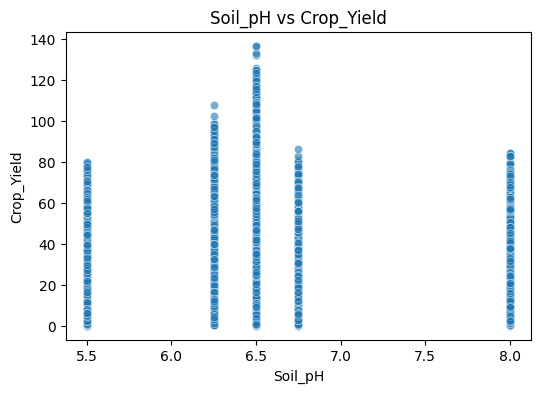

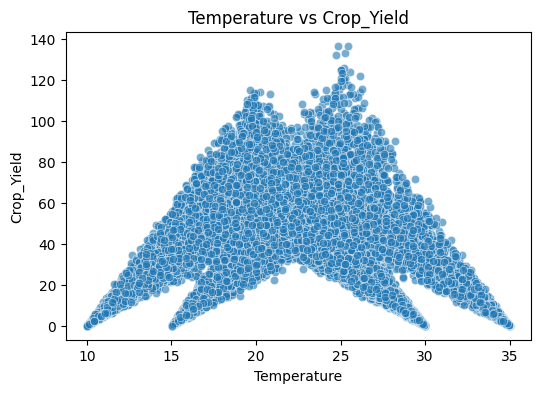

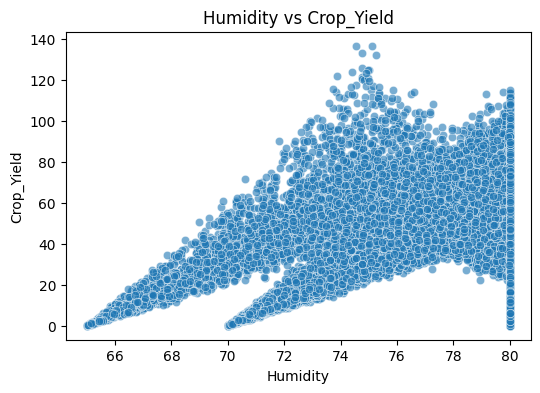

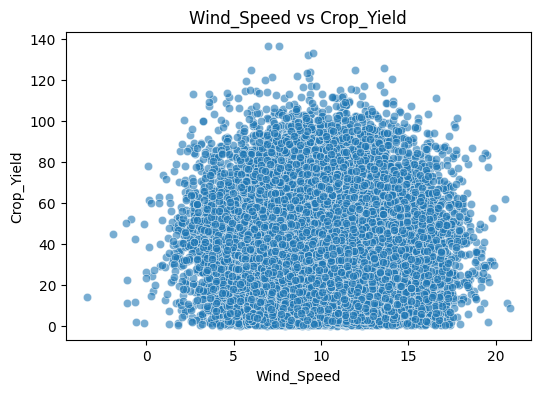

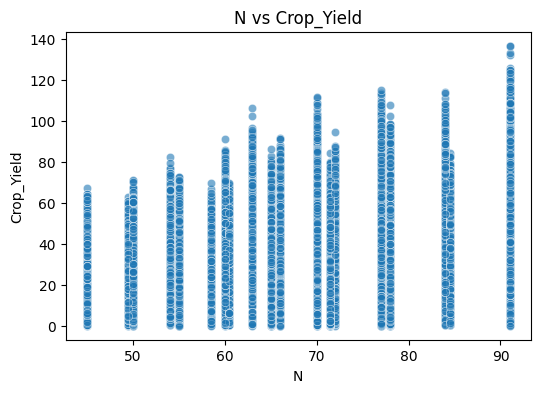

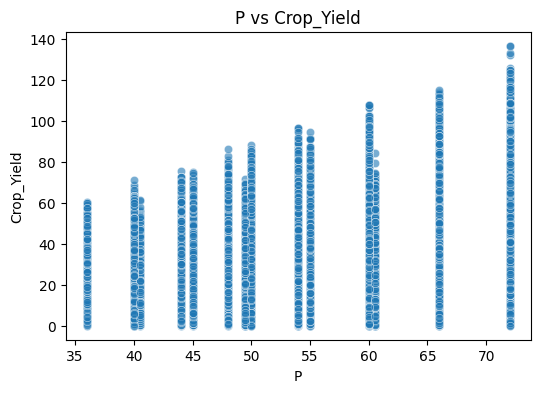

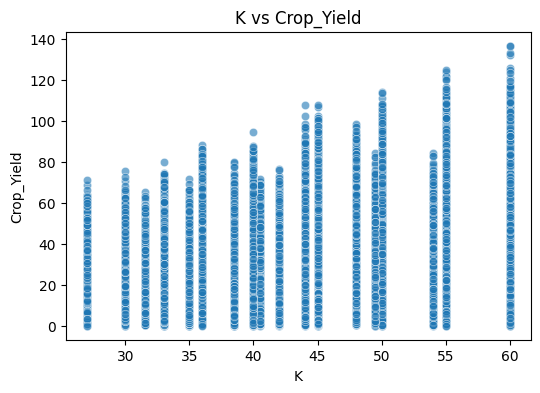

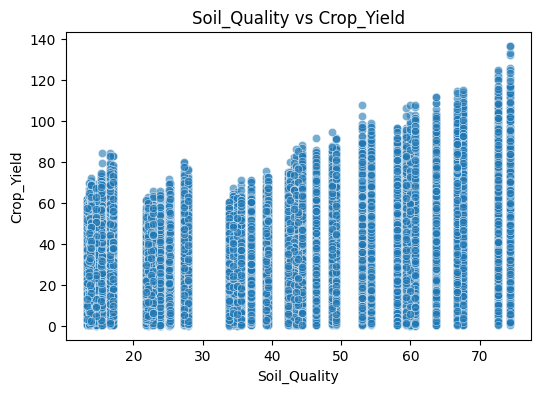

In [49]:
numeric_features = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df_clean, x=feature, y='Crop_Yield', alpha=0.6)
    plt.title(f'{feature} vs Crop_Yield')
    plt.xlabel(feature)
    plt.ylabel('Crop_Yield')
    plt.show()

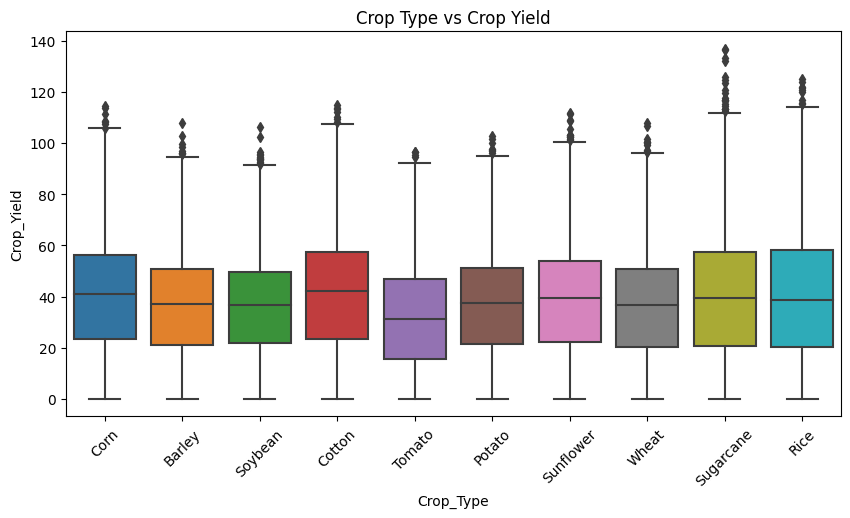

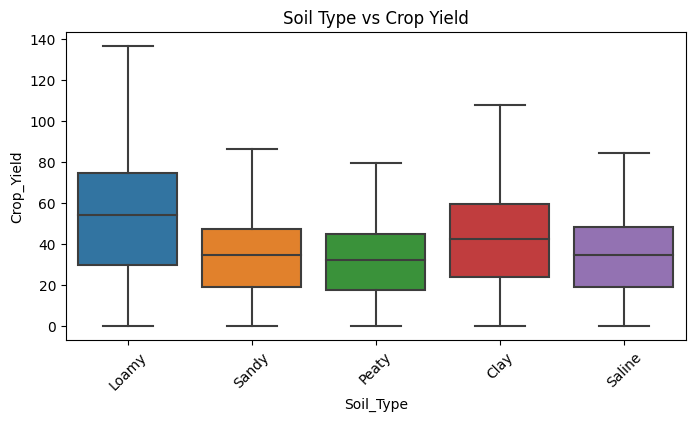

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x='Crop_Type', y='Crop_Yield')
plt.title('Crop Type vs Crop Yield')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df_clean, x='Soil_Type', y='Crop_Yield')
plt.title('Soil Type vs Crop Yield')
plt.xticks(rotation=45)
plt.show()

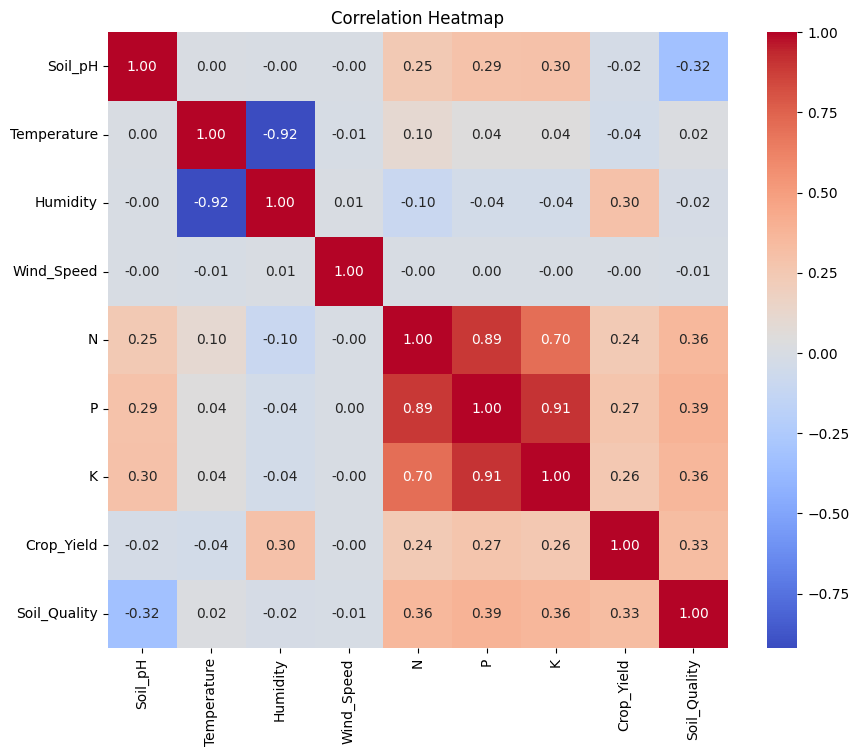

In [51]:
plt.figure(figsize=(10,8))
# Exclude non-numeric columns like 'Date' before calculating correlation
numeric_df_clean = df_clean.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

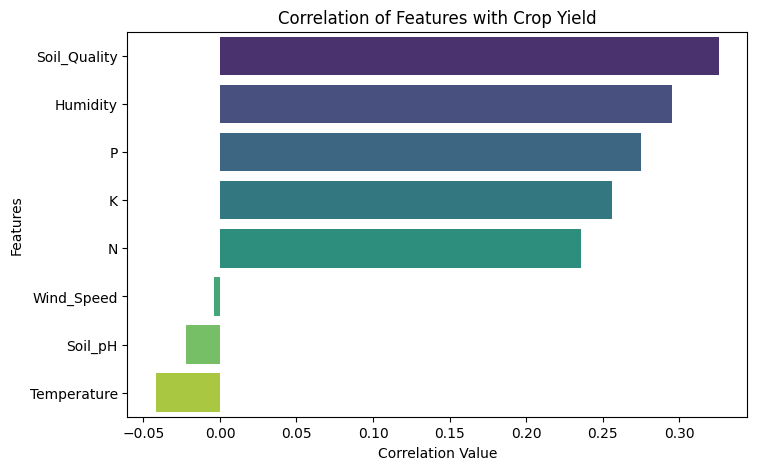

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_with_yield = df_clean.corr(numeric_only=True)['Crop_Yield'].drop('Crop_Yield').sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_yield.values, y=corr_with_yield.index, palette='viridis')
plt.title("Correlation of Features with Crop Yield")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()

In [53]:
!pip install category_encoders scikit-learn

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import category_encoders as ce

# Copy of your clean dataset
df_encoded = df_clean.copy()

# Separate categorical and numeric columns
cat_cols = ['Crop_Type', 'Soil_Type']
num_cols = [c for c in df_clean.columns if c not in cat_cols]

In [55]:
import os

# Kaggle allows writing only in /kaggle/working
output_folder = "/kaggle/working/agri_encoded_datasets"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

print("📁 Output folder created at:", output_folder)


📁 Output folder created at: /kaggle/working/agri_encoded_datasets


In [56]:
encoder = ce.OneHotEncoder(cols=cat_cols, use_cat_names=True)
scaler = StandardScaler()

In [57]:
!pip install category_encoders

In [60]:
# ================== IMPORTS ==================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    PowerTransformer, QuantileTransformer, OneHotEncoder, OrdinalEncoder
)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
# LGBMRegressor removed!
from catboost import CatBoostRegressor

import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

# ================== LOAD DATA ==================
df = pd.read_csv("/kaggle/working/AgriYield_cleaned.csv")

# ✅ FIX DATE COLUMN
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df = df.drop(columns=["Date"])

# Separate target and features
X = df.drop(columns=["Crop_Yield"])
y = df["Crop_Yield"]

# Identify feature types, ENSURE NO OVERLAP!
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [col for col in X.columns if col not in cat_cols]

# ================== ENCODERS ==================
encoders = {
    "ordinal": OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    "onehot": OneHotEncoder(handle_unknown="ignore", sparse=False),
    "target": ce.TargetEncoder(),
    "leaveoneout": ce.LeaveOneOutEncoder(),
    "binary": ce.BinaryEncoder()
}

# ================== SCALERS ==================
scalers = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "power": PowerTransformer(method='yeo-johnson'),
    "quantile": QuantileTransformer(output_distribution='normal')
}

# ================== MODELS (EXCEPT CATBOOST) ==================
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42)
    # LGBMRegressor REMOVED!
}

results = []

# One-time split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ================== LOOP FOR ALL MODELS EXCEPT CATBOOST ==================
for enc_name, encoder in encoders.items():
    for sc_name, scaler in scalers.items():
        for model_name, model in models.items():

            preprocessor = ColumnTransformer([
                ("encoder", encoder, cat_cols),     # Apply encoder only to categorical columns
                ("scaler", scaler, num_cols)        # Apply scaler only to numeric columns
            ], remainder="drop")                    # Drop untransformed columns

            pipe = Pipeline([
                ("prep", preprocessor),
                ("model", model)
            ])

            pipe.fit(X_train, y_train)
            preds = pipe.predict(X_test)

            mae = mean_absolute_error(y_test, preds)
            mse = mean_squared_error(y_test, preds)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, preds)
            adj_r2 = 1 - (1 - r2) * (len(X) - 1) / (len(X) - X.shape[1] - 1)

            results.append([enc_name, sc_name, model_name, mae, mse, rmse, r2, adj_r2])
            print(f"✅ Done: {enc_name}, {sc_name}, {model_name}")

# ================== SPECIAL CASE: CATBOOST (NO ENCODING / NO SCALING) ==================
cat_features_idx = [X.columns.get_loc(col) for col in cat_cols]

cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train, cat_features=cat_features_idx)

preds = cat_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
adj_r2 = 1 - (1 - r2) * (len(X) - 1) / (len(X) - X.shape[1] - 1)

results.append(["none", "none", "CatBoost", mae, mse, rmse, r2, adj_r2])
print("✅ Done: CatBoost (raw categories)")

# ================== SAVE & SHOW RESULTS ==================
results_df = pd.DataFrame(results, columns=["Encoder", "Scaler", "Model", "MAE", "MSE", "RMSE", "R2", "Adj_R2"])
results_df = results_df.sort_values(by="RMSE")

print("\n🎯 BEST MODEL")
print(results_df.head(1))

print("\n📌 TOP 10 MODELS")
print(results_df.head(10))

results_df.to_csv("/kaggle/working/regression_full_results.csv", index=False)

print("\n💾 Results saved to: /kaggle/working/regression_full_results.csv")


✅ Done: ordinal, standard, RandomForest
✅ Done: ordinal, standard, ExtraTrees
✅ Done: ordinal, standard, XGBRegressor
✅ Done: ordinal, minmax, RandomForest
✅ Done: ordinal, minmax, ExtraTrees
✅ Done: ordinal, minmax, XGBRegressor
✅ Done: ordinal, robust, RandomForest
✅ Done: ordinal, robust, ExtraTrees
✅ Done: ordinal, robust, XGBRegressor
✅ Done: ordinal, power, RandomForest
✅ Done: ordinal, power, ExtraTrees
✅ Done: ordinal, power, XGBRegressor
✅ Done: ordinal, quantile, RandomForest
✅ Done: ordinal, quantile, ExtraTrees
✅ Done: ordinal, quantile, XGBRegressor
✅ Done: onehot, standard, RandomForest
✅ Done: onehot, standard, ExtraTrees
✅ Done: onehot, standard, XGBRegressor
✅ Done: onehot, minmax, RandomForest
✅ Done: onehot, minmax, ExtraTrees
✅ Done: onehot, minmax, XGBRegressor
✅ Done: onehot, robust, RandomForest
✅ Done: onehot, robust, ExtraTrees
✅ Done: onehot, robust, XGBRegressor
✅ Done: onehot, power, RandomForest
✅ Done: onehot, power, ExtraTrees
✅ Done: onehot, power, XGBRe

In [61]:
!pip install catboost

In [62]:
# ================== IMPORTS ==================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

# ================== LOAD DATA ==================
dataset_path = "/kaggle/working/AgriYield_cleaned.csv"
df_clean = pd.read_csv(dataset_path)

print("✅ Dataset Loaded Successfully")
print("Shape:", df_clean.shape)
df_clean.head()


✅ Dataset Loaded Successfully
Shape: (25495, 12)


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
1,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
3,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
4,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


In [63]:
df_clean = df_clean.drop(columns=["Date"])
df_clean['Crop_Type'] = df_clean['Crop_Type'].str.lower().str.strip()
df_clean['Soil_Type'] = df_clean['Soil_Type'].str.lower().str.strip()

In [64]:
X = df_clean.drop(columns=["Crop_Yield"])
y = df_clean["Crop_Yield"]

# Identify categorical columns
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical Columns:", cat_features)

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

Categorical Columns: ['Crop_Type', 'Soil_Type']


In [65]:
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)
    

In [66]:
model.fit(X_train, y_train, cat_features=cat_features)


# ================== PREDICT ==================
y_pred = model.predict(X_test)


# ================== METRICS ==================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


# ================== DISPLAY RESULTS ==================
print("\n🎯 Model Performance Metrics")
print("---------------------------------")
print(f"MAE       : {mae:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"RMSE      : {rmse:.4f}")
print(f"R2 Score  : {r2:.4f}")
print(f"Adj R2    : {adj_r2:.4f}")
print("---------------------------------")

0:	learn: 21.6620754	total: 14.3ms	remaining: 7.11s
100:	learn: 5.1943034	total: 1.28s	remaining: 5.07s
200:	learn: 4.6570291	total: 2.41s	remaining: 3.58s
300:	learn: 4.4923032	total: 3.56s	remaining: 2.35s
400:	learn: 4.4130856	total: 4.73s	remaining: 1.17s
499:	learn: 4.3469804	total: 5.88s	remaining: 0us

🎯 Model Performance Metrics
---------------------------------
MAE       : 3.2079
MSE       : 20.9344
RMSE      : 4.5754
R2 Score  : 0.9586
Adj R2    : 0.9585
---------------------------------


In [67]:
# ================== SAVE MODEL ==================
model.save_model("/kaggle/working/crop_yield_catboost_model.cbm")
print("✅ Model saved successfully at /kaggle/working/crop_yield_catboost_model.cbm")


✅ Model saved successfully at /kaggle/working/crop_yield_catboost_model.cbm


In [68]:
import joblib

# ================== SAVE MODEL ==================
joblib.dump(model, "/kaggle/working/crop_yield_catboost_model.pkl")
print("✅ Model saved as .pkl successfully at /kaggle/working/crop_yield_catboost_model.pkl")


✅ Model saved as .pkl successfully at /kaggle/working/crop_yield_catboost_model.pkl


In [69]:
import pandas as pd
from catboost import CatBoostRegressor

# ================== LOAD MODEL ==================
model = CatBoostRegressor()
model.load_model("/kaggle/working/crop_yield_catboost_model.cbm")
print("✅ Model loaded successfully!")

# ================== PREDICTION FUNCTION ==================
def predict_yield(Crop_Type, Soil_Type, Soil_pH, Temperature, Humidity, Wind_Speed, N, P, K, Soil_Quality):

    input_data = pd.DataFrame([{
        "Crop_Type": Crop_Type,
        "Soil_Type": Soil_Type,
        "Soil_pH": Soil_pH,
        "Temperature": Temperature,
        "Humidity": Humidity,
        "Wind_Speed": Wind_Speed,
        "N": N,
        "P": P,
        "K": K,
        "Soil_Quality": Soil_Quality
    }])

    prediction = model.predict(input_data)[0]
    return prediction

# ================== TEST PREDICTIONS ==================
print(predict_yield("corn", "loamy", 6.5, 20.0525764240326, 79.9474235759674, 8.59157684219514, 84, 66, 50, 66.6666666666667))  # first row
print(predict_yield("sunflower", "clay", 6.25, 11.4556922091307, 80, 5.39475781321834, 60, 0, 44, 46.375))  # last row
print(predict_yield("cotton", "sandy", 6.75, 17.9397554108704, 80, 7.30373536453604, 55, 0, 36, 39.375))  # 10k row
print(predict_yield("sugarcane", "saline", 8, 17.8958289913123, 80, 13.3681354757762, 84.5, 5064, 54, 17.0416666666667))  # 5k row


✅ Model loaded successfully!
96.00672995574381
9.88689708256888
46.846420885889266
19.090334044934593


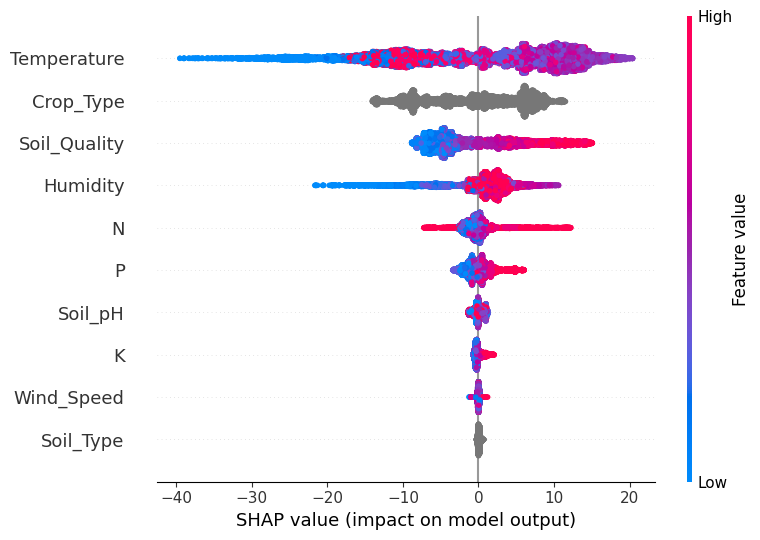

In [70]:
# ================== SHAP EXPLAINABILITY ==================
!pip install shap --quiet

import shap

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summary Plot (Global Feature Effect)
shap.summary_plot(shap_values, X_train)